# Salary Prediction Using Linear Regression

In [1]:
# import all libraries and dependencies for dataframe
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization (plotting)
import seaborn as sns # data visualization

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split # model selection
from sklearn.linear_model import LinearRegression # classifier
from sklearn.metrics import r2_score, mean_squared_error # model metrics

## Understanding the Data

In [2]:
df = pd.read_csv('Salary.csv')
df.head() 

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
df.shape # (rows, columns)

(35, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 692.0 bytes


## Regression Plot

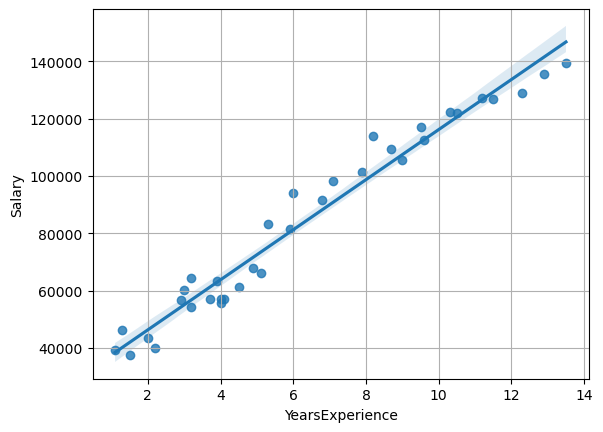

In [5]:
sns.regplot(x = 'YearsExperience', y = 'Salary', data = df)
plt.grid()
plt.show()

## Model Training (Linear Regression)

In [6]:
# Import columns into variables
X = df['YearsExperience']
y = df['Salary']

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
# Create the linear regression model
model = LinearRegression()

In [9]:
# Train the model on the training data
model.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [10]:
# Make predictions on the training data
y_pred_train = model.predict(X_train.values.reshape(-1,1))

# Make predictions on the testing data
y_pred_test = model.predict(X_test.values.reshape(-1,1))

In [11]:
# R2-Score on training and testing data
print("The R2-Score is: ")
print("R2- Score of training data %.2f\nR2- Score of test data %.2f\n"%(r2_score(y_train,y_pred_train),r2_score(y_test,y_pred_test)))

# Mean Square Error (MSE) on training and testing data
print("The Mean Square Error (MSE) is : ")
print("MSE of training data is %.2f\nMSE of test data is %.2f"%(np.sqrt(mean_squared_error(y_train,y_pred_train)),np.sqrt(mean_squared_error(y_test,y_pred_test))))

The R2-Score is: 
R2- Score of training data 0.97
R2- Score of test data 0.89

The Mean Square Error (MSE) is : 
MSE of training data is 5557.78
MSE of test data is 7467.38


## Scatter Plot on Training Data

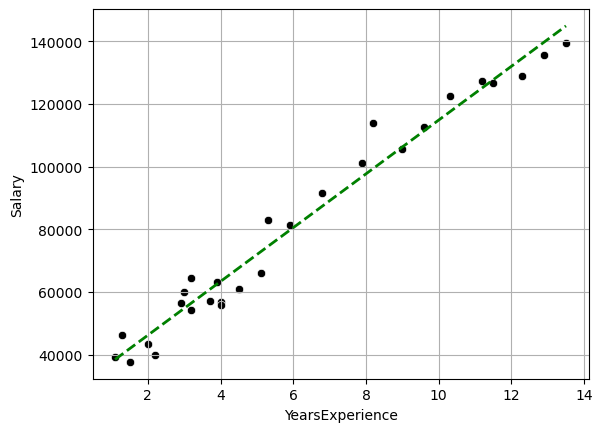

In [12]:
# Scatterplot on training data
sns.scatterplot(x = X_train, y = y_train, color = 'k')
sns.lineplot(x = X_train, y = y_pred_train, linewidth = 2, linestyle = '--', color = 'g')
plt.grid()
plt.show()

## Scatter Plot on Test Data

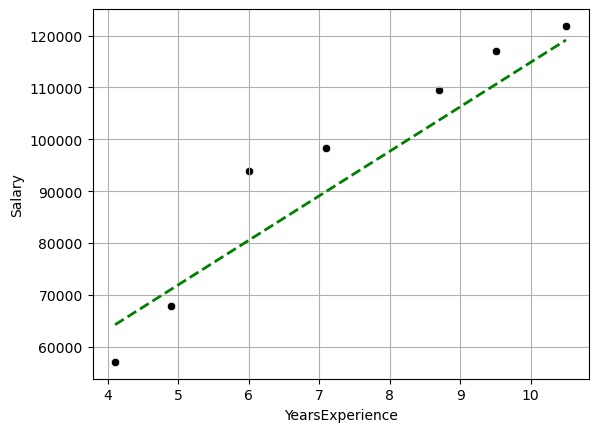

In [13]:
# Scatterplot on test data
sns.scatterplot(x = X_test, y = y_test, color ='k')
sns.lineplot(x = X_test, y = y_pred_test, linewidth = 2, linestyle = '--', color = 'g')
plt.grid()
plt.show()

In [14]:
print("If the candidate is experienced, then the salary will be %.2f times the experience"%model.coef_[0])

print("--"*43)

print("If the candidate is fresher, the the salary will be %.2f"%model.intercept_)

If the candidate is experienced, then the salary will be 8578.77 times the experience
--------------------------------------------------------------------------------------
If the candidate is fresher, the the salary will be 29078.63


**This Implies**

`Salary` = 29078.63 + (8578.77 * `Experience`)

In [15]:
def salary_predictor(x):
    salary = model.predict([[x]])[0]
    print("If experience is %d then salary will be %.2f"%(x,salary))

In [16]:
# Illustration:

salary_predictor(45)

If experience is 45 then salary will be 415123.16
